## Gas Prices: Data Visualization

Visualizations of Data from many Sources

**Seaborn**

### Import and preprocess dataset

In [ ]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# Dataset
raw_data = pd.read_csv('datasets/polttoneste_hinnat1988-2025.csv', skiprows=1, encoding='latin1')
raw_data

,Kuukausi,Polttoneste,Hinta,"Hinta, vuosimuutos (%)"
0,1988M01,"Moottoribensiini 95 E 10, snt/l",56.0,.
1,1988M01,"Dieselöljy, snt/l",40.0,.
2,1988M01,"Kevyt polttoöljy, snt/l",16.0,.
3,1988M01,"Kevyt polttoöljy, eur/MWh",16.1,.
4,1988M02,"Moottoribensiini 95 E 10, snt/l",56.0,.
...,...,...,...,...
1783,2025M02,"Kevyt polttoöljy, eur/MWh",132.4,-11.4
1784,2025M03,"Moottoribensiini 95 E 10, snt/l",179.0,-6.8
1785,2025M03,"Dieselöljy, snt/l",179.0,-7.7
1786,2025M03,"Kevyt polttoöljy, snt/l",126.0,-12.5


In [22]:
# data preprocessing
dates = pd.to_datetime(raw_data['Kuukausi'], format="%YM%m").dt.to_period("M") # create datetime index

raw_data = raw_data.set_index(dates) # set index

raw_data = raw_data.drop(columns=['Kuukausi']) # remove old column

raw_data['Hinta'] = pd.to_numeric(raw_data['Hinta'], errors='coerce') # Set hinta column as numeric

raw_data 

,Polttoneste,Hinta,"Hinta, vuosimuutos (%)"
Kuukausi,,,
1988-01,"Moottoribensiini 95 E 10, snt/l",56.0,.
1988-01,"Dieselöljy, snt/l",40.0,.
1988-01,"Kevyt polttoöljy, snt/l",16.0,.
1988-01,"Kevyt polttoöljy, eur/MWh",16.1,.
1988-02,"Moottoribensiini 95 E 10, snt/l",56.0,.
...,...,...,...
2025-02,"Kevyt polttoöljy, eur/MWh",132.4,-11.4
2025-03,"Moottoribensiini 95 E 10, snt/l",179.0,-6.8
2025-03,"Dieselöljy, snt/l",179.0,-7.7


In [23]:
# filter gasoline data
gas_price_data = raw_data[~raw_data['Polttoneste'].isin(['Kevyt polttoöljy, snt/l', 'Kevyt polttoöljy, eur/MWh', 'Dieselöljy, snt/l'])]
gas_price_data

,Polttoneste,Hinta,"Hinta, vuosimuutos (%)"
Kuukausi,,,
1988-01,"Moottoribensiini 95 E 10, snt/l",56.0,.
1988-02,"Moottoribensiini 95 E 10, snt/l",56.0,.
1988-03,"Moottoribensiini 95 E 10, snt/l",56.0,.
1988-04,"Moottoribensiini 95 E 10, snt/l",56.0,.
1988-05,"Moottoribensiini 95 E 10, snt/l",56.3,.
...,...,...,...
2024-11,"Moottoribensiini 95 E 10, snt/l",175.0,-10.3
2024-12,"Moottoribensiini 95 E 10, snt/l",176.0,-5.9
2025-01,"Moottoribensiini 95 E 10, snt/l",179.0,1.7


In [24]:
diesel_price_data = raw_data[~raw_data['Polttoneste'].isin(['Kevyt polttoöljy, snt/l', 'Kevyt polttoöljy, eur/MWh', 'Moottoribensiini 95 E 10, snt/l'])]
diesel_price_data

,Polttoneste,Hinta,"Hinta, vuosimuutos (%)"
Kuukausi,,,
1988-01,"Dieselöljy, snt/l",40.0,.
1988-02,"Dieselöljy, snt/l",40.0,.
1988-03,"Dieselöljy, snt/l",40.0,.
1988-04,"Dieselöljy, snt/l",39.7,.
1988-05,"Dieselöljy, snt/l",39.9,.
...,...,...,...
2024-11,"Dieselöljy, snt/l",172.0,-15.3
2024-12,"Dieselöljy, snt/l",177.0,-10.2
2025-01,"Dieselöljy, snt/l",180.0,-1.6


Set index and remove unwanted columns

### Visualization / plotting

In [25]:
raw_data

,Polttoneste,Hinta,"Hinta, vuosimuutos (%)"
Kuukausi,,,
1988-01,"Moottoribensiini 95 E 10, snt/l",56.0,.
1988-01,"Dieselöljy, snt/l",40.0,.
1988-01,"Kevyt polttoöljy, snt/l",16.0,.
1988-01,"Kevyt polttoöljy, eur/MWh",16.1,.
1988-02,"Moottoribensiini 95 E 10, snt/l",56.0,.
...,...,...,...
2025-02,"Kevyt polttoöljy, eur/MWh",132.4,-11.4
2025-03,"Moottoribensiini 95 E 10, snt/l",179.0,-6.8
2025-03,"Dieselöljy, snt/l",179.0,-7.7


TypeError: Invalid object type at position 0

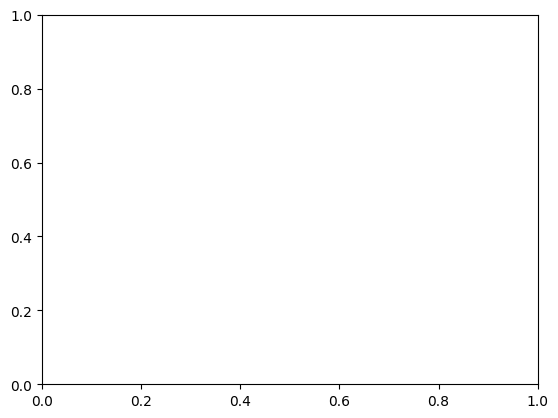

In [28]:
sns.lineplot(x=gas_price_data.index.values, y="Hinta", data=gas_price_data)
plt.show()

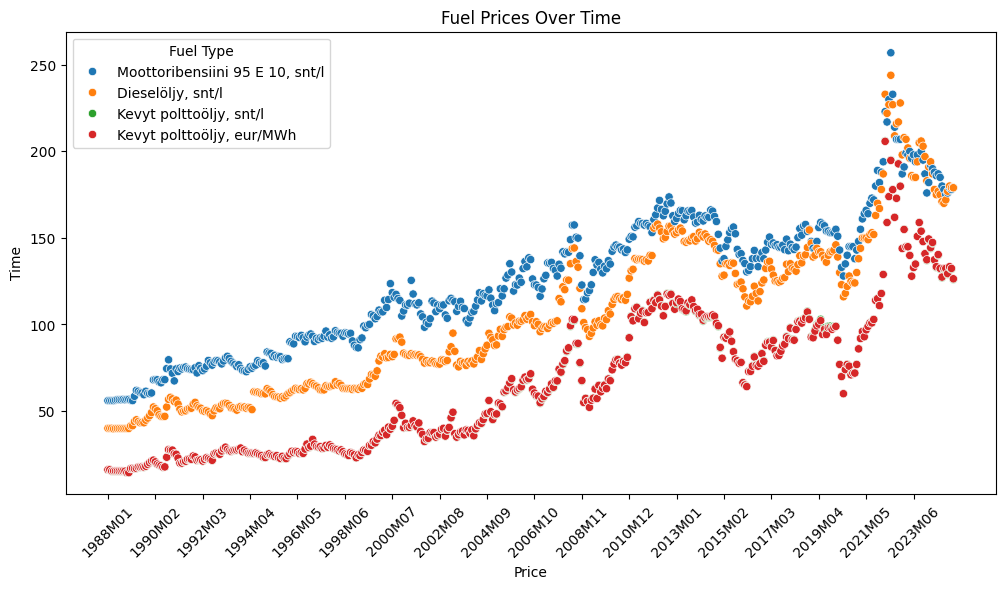

In [ ]:
# Scatter plot
plt.figure(figsize=(12, 6))  # width=12 inches, height=6 inches
# plot
sns.scatterplot(
    x='Kuukausi', 
    y='Hinta', 
    hue='Polttoneste',  # different colors for each fuel
    data=raw_data
)
# Show only every 10th tick on y-axis
ticks = raw_data['Kuukausi'][::100]
plt.xticks(ticks, rotation=45)  # rotate 45 degrees
# labels and show plot
plt.xlabel("Price")
plt.ylabel("Time")
plt.title("Fuel Prices Over Time")
plt.legend(title='Fuel Type')
plt.show()

## ARIMA Forecast

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


In [49]:
!pip install pmdarima

   ---------------------------------------- 0.0/625.1 kB ? eta -:--:--
   --- ------------------------------------ 61.4/625.1 kB 1.1 MB/s eta 0:00:01
   ------------------------------------ --- 563.2/625.1 kB 5.9 MB/s eta 0:00:01
   ---------------------------------------- 625.1/625.1 kB 5.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
   ------ --------------------------------- 0.5/2.7 MB 14.2 MB/s eta 0:00:01
   -------------- ------------------------- 1.0/2.7 MB 12.3 MB/s eta 0:00:01
   ---------------------- ----------------- 1.5/2.7 MB 12.0 MB/s eta 0:00:01
   ------------------------------ --------- 2.1/2.7 MB 11.9 MB/s eta 0:00:01
   -------------------------------------- - 2.6/2.7 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 2.7/2.7 MB 11.5 MB/s eta 0:00:00


In [51]:
# auto-arima
from pmdarima.arima import auto_arima

### First find best parameters 
with auto-arima

In [53]:
model_autoARIMA = auto_arima(diesel_price_data['Hinta'])
print(model_autoARIMA.summary())

C:\Users\Nikla_000\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Nikla_000\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Nikla_000\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Nikla_000\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
C:\Users\Nikla_000\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: '

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  447
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1324.962
Date:                Mon, 18 Aug 2025   AIC                           2651.924
Time:                        17:36:51   BIC                           2656.025
Sample:                    01-01-1988   HQIC                          2653.541
                         - 03-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        22.2792      0.412     54.052      0.000      21.471      23.087
Ljung-Box (L1) (Q):                   1.72   Jarque-Bera (JB):             10889.72
Prob(Q):                              0.19   Pr

C:\Users\Nikla_000\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [54]:
model = ARIMA(diesel_price_data['Hinta'], order=(0, 1, 0))
res = model.fit()
print(res.summary())


                               SARIMAX Results                                
Dep. Variable:                  Hinta   No. Observations:                  447
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1324.962
Date:                Mon, 18 Aug 2025   AIC                           2651.924
Time:                        17:39:03   BIC                           2656.025
Sample:                    01-01-1988   HQIC                          2653.541
                         - 03-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        22.2792      0.412     54.052      0.000      21.471      23.087
Ljung-Box (L1) (Q):                   1.72   Jarque-Bera (JB):             10889.72
Prob(Q):                              0.19   Pr

In [55]:
# Convert PeriodIndex to datetime
diesel_price_data.index = diesel_price_data.index.to_timestamp()

AttributeError: 'DatetimeIndex' object has no attribute 'to_timestamp'

In [56]:
# Get forecast with confidence intervals
forecast = res.get_forecast(steps=12)

# Extract the forecasted values
forecast_values = forecast.predicted_mean

# Extract the confidence intervals (lower and upper bounds)
forecast_conf_int = forecast.conf_int()

In [57]:
forecast_conf_int.head(3)

,lower Hinta,upper Hinta
2025-04-01,169.748795,188.251205
2025-05-01,165.916820,192.083180
2025-06-01,162.976442,195.023558


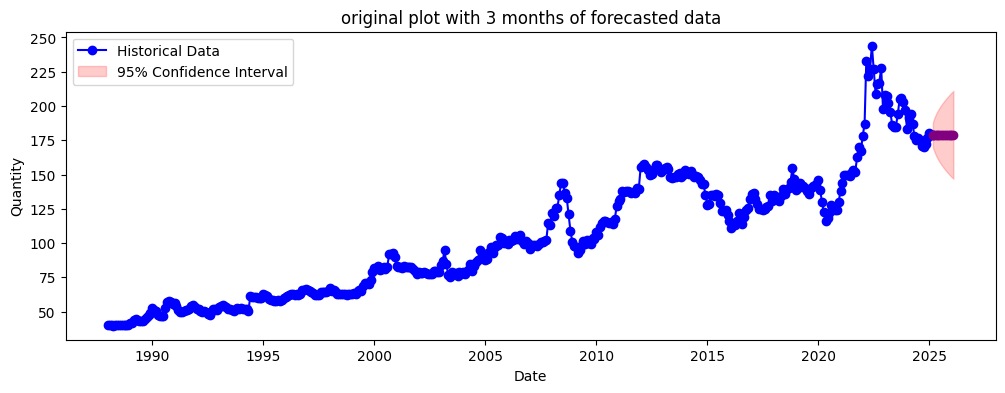

In [58]:
# visualize predictions in original plot
plt.figure(figsize=(12,4))
plt.title('original plot with 3 months of forecasted data')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.plot(diesel_price_data.index, diesel_price_data['Hinta'], marker='o', linestyle='-', color='blue', label='Historical Data')

# create dates for the forecasted values
future_dates = pd.date_range(start=diesel_price_data.index[-1], periods=12, freq='MS')

# plot the forecasted values
plt.plot(future_dates, forecast_values, marker='o', linestyle='-', color='purple')

# Plot confidence intervals
plt.fill_between(future_dates,
                 forecast_conf_int['lower Hinta'],  # lower bound
                 forecast_conf_int['upper Hinta'],  # upper bound
                 color='red', alpha=0.2, label='95% Confidence Interval')

plt.legend()
plt.show()